# Bet Against Beta Portfolio #

In [50]:
# Import Libraries

# Data Management
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Statistics
import statsmodels.api as sm

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from other_data_functions import wexp
from portfolios_helper import calculate_analytics

In [44]:
# Import Data
returns = pd.read_csv(r'..\additional_data\stocks_returns.csv')
returns.set_index('Date', inplace=True)
returns.index = pd.to_datetime(returns.index)
returns = returns.dropna(axis=1)

returns

,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WST,WY,X,XEL,XOM,XRAY,XRX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-05,0.048789,0.001281,-0.039193,-0.021506,0.028632,0.003752,-0.009288,-0.001397,-0.008823,-0.002625,...,-0.003578,0.008733,0.044314,0.002275,-0.008643,0.009709,0.018928,0.019293,0.016878,-0.003114
1999-01-06,-0.036742,-0.007712,0.000000,-0.036462,0.023906,0.007463,0.023060,0.020735,-0.001478,0.007853,...,0.001790,0.008658,0.113257,0.004535,0.039154,0.009615,0.019087,0.015170,0.002090,0.001039
1999-01-07,0.074963,-0.012987,-0.005831,0.020998,-0.023906,-0.003724,0.016579,-0.001373,-0.008916,-0.009168,...,0.000000,0.003688,-0.018392,-0.004535,-0.001670,-0.002395,-0.004610,-0.005031,0.022705,-0.007295
1999-01-08,0.000000,-0.003929,-0.005865,0.014185,-0.030708,-0.007491,-0.010519,0.000000,-0.008995,-0.003955,...,-0.008984,0.083529,0.047556,-0.006841,-0.005870,-0.012063,-0.004631,0.002519,0.104544,0.002090
1999-01-11,0.019256,-0.013211,-0.048202,0.003834,-0.002082,-0.003766,-0.010631,-0.029270,-0.021310,-0.001322,...,0.005400,0.000000,-0.040638,-0.023150,-0.042085,-0.032062,0.014337,0.026073,-0.045120,-0.027515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011413,0.003929,0.006278,0.002683,0.014781,0.004355,0.007822,0.012494,0.013291,-0.005291,...,0.009663,0.006390,0.018946,0.007210,0.000940,-0.002642,-0.023556,0.008480,0.012187,0.010791
2024-12-26,0.003171,0.004434,0.002802,0.004944,-0.000138,-0.000395,0.002594,-0.003159,-0.002203,-0.003362,...,0.001981,-0.003190,-0.030811,-0.000440,0.000845,0.013663,-0.006522,0.007380,0.003559,0.006889
2024-12-27,-0.013331,-0.002432,-0.006369,-0.008208,-0.004919,-0.000593,-0.003539,-0.008999,-0.006305,0.004876,...,-0.000630,-0.006410,0.004506,-0.000587,-0.000094,-0.003163,-0.002183,-0.005678,-0.019799,-0.012179


In [45]:
# Get the important data for the Risk-Free Rate
rfr = pd.read_csv(r"..\additional_data\risk_free_rate.csv")
rfr.set_index('Date', inplace=True)
rfr.index = pd.to_datetime(rfr.index)

# Get the important data for the S&P500
benchmark = pd.read_csv(r'..\additional_data\benchmark_returns.csv')
benchmark.set_index('Date', inplace=True)
benchmark.index = pd.to_datetime(benchmark.index)

### Calculate Betas ###

In [46]:
# Calculate the Market Excess Returns
market_premium = benchmark['benchmark_returns'] - rfr['risk_free_rate']
market_premium.name = 'market_excess_returns'

market_premium

Date
1999-01-05    0.013359
1999-01-06    0.021768
1999-01-07   -0.002186
1999-01-08    0.004078
1999-01-11   -0.008966
                ...   
2024-12-24    0.010855
2024-12-26   -0.000533
2024-12-27   -0.011246
2024-12-30   -0.010886
2024-12-31   -0.004421
Name: market_excess_returns, Length: 6540, dtype: float64

In [48]:
# Calculate Stocks Excess Returns
excess_returns = returns.sub(rfr['risk_free_rate'], axis=0)
excess_returns.dropna(inplace = True)

excess_returns

,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WST,WY,X,XEL,XOM,XRAY,XRX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-05,0.048658,0.001150,-0.039324,-0.021637,0.028500,0.003621,-0.009419,-0.001529,-0.008955,-0.002756,...,-0.003709,0.008602,0.044183,0.002144,-0.008774,0.009578,0.018797,0.019162,0.016747,-0.003245
1999-01-06,-0.036873,-0.007844,-0.000131,-0.036594,0.023775,0.007332,0.022929,0.020603,-0.001609,0.007722,...,0.001659,0.008527,0.113126,0.004404,0.039023,0.009484,0.018956,0.015039,0.001959,0.000908
1999-01-07,0.074831,-0.013120,-0.005963,0.020866,-0.024038,-0.003857,0.016447,-0.001505,-0.009048,-0.009300,...,-0.000132,0.003555,-0.018524,-0.004667,-0.001803,-0.002527,-0.004742,-0.005163,0.022572,-0.007428
1999-01-08,-0.000135,-0.004063,-0.006000,0.014050,-0.030843,-0.007625,-0.010653,-0.000135,-0.009130,-0.004089,...,-0.009119,0.083394,0.047422,-0.006976,-0.006005,-0.012197,-0.004765,0.002384,0.104409,0.001955
1999-01-11,0.019121,-0.013346,-0.048337,0.003698,-0.002217,-0.003902,-0.010766,-0.029406,-0.021446,-0.001458,...,0.005265,-0.000135,-0.040773,-0.023285,-0.042220,-0.032197,0.014202,0.025937,-0.045256,-0.027651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011285,0.003801,0.006151,0.002555,0.014654,0.004227,0.007695,0.012366,0.013163,-0.005418,...,0.009535,0.006262,0.018818,0.007082,0.000813,-0.002770,-0.023683,0.008353,0.012060,0.010664
2024-12-26,0.003043,0.004307,0.002675,0.004817,-0.000265,-0.000522,0.002467,-0.003286,-0.002330,-0.003489,...,0.001854,-0.003317,-0.030938,-0.000567,0.000718,0.013536,-0.006649,0.007253,0.003432,0.006762
2024-12-27,-0.013459,-0.002560,-0.006497,-0.008337,-0.005047,-0.000721,-0.003667,-0.009127,-0.006433,0.004748,...,-0.000758,-0.006539,0.004378,-0.000715,-0.000222,-0.003291,-0.002312,-0.005806,-0.019927,-0.012307


In [51]:
trimmed_returns = excess_returns.loc['1999':'2014']
trimmed_market = market_premium.loc[trimmed_returns.index]

In [52]:
tickers = returns.columns

In [53]:
# We can use StatsModels efficiently to get the betas for the whole history
betas_list = []

# Loop to Obtain Betas and Alpha + Residuals
for ticker in tickers:
    # Define series
    y_series = trimmed_returns[ticker].dropna()
    
    # Set the Window
    window = len(y_series)
    weights = window * wexp(window, window/2)
    
    # Define weights
    model = sm.WLS(y_series, sm.add_constant(trimmed_market), weights=weights)
    results = model.fit()
    
    beta = results.params.iloc[1]
    
    betas_list.append(beta)

# Create Beta Series
betas_series = pd.Series(betas_list, index=tickers)
betas_series.name = 'history_beta'

betas_series.sort_values(ascending=False)

MTG     2.090118
MS      1.977864
LNC     1.937256
SANM    1.899715
MTW     1.853920
          ...   
ED      0.449858
CAG     0.439153
SNT     0.422213
SO      0.419113
GIS     0.396859
Name: history_beta, Length: 435, dtype: float64

### First Strategy: Long Only Betas ###

In [54]:
long_beta_portfolio_weights = betas_series / betas_series.sum()
long_beta_portfolio_weights.name = 'weights'

long_beta_portfolio_weights

AAPL    0.002308
ABT     0.001212
ACGL    0.001305
ADBE    0.002770
ADI     0.002578
          ...   
XRAY    0.001687
XRX     0.002550
YUM     0.001783
ZBRA    0.002000
ZION    0.003221
Name: weights, Length: 435, dtype: float64

In [58]:
# Portfolio Returns
long_portfolio_returns = returns.loc['2015':] @ long_beta_portfolio_weights
long_portfolio_returns.name = 'long_portfolio_returns'

long_portfolio_returns

Date
2015-01-02   -0.001040
2015-01-05   -0.019442
2015-01-06   -0.011864
2015-01-07    0.012256
2015-01-08    0.017394
                ...   
2024-12-24    0.007377
2024-12-26    0.002342
2024-12-27   -0.007766
2024-12-30   -0.006779
2024-12-31    0.003799
Name: long_portfolio_returns, Length: 2516, dtype: float64

In [59]:
long_portfolio_returns.mean()

0.0003080126412431881

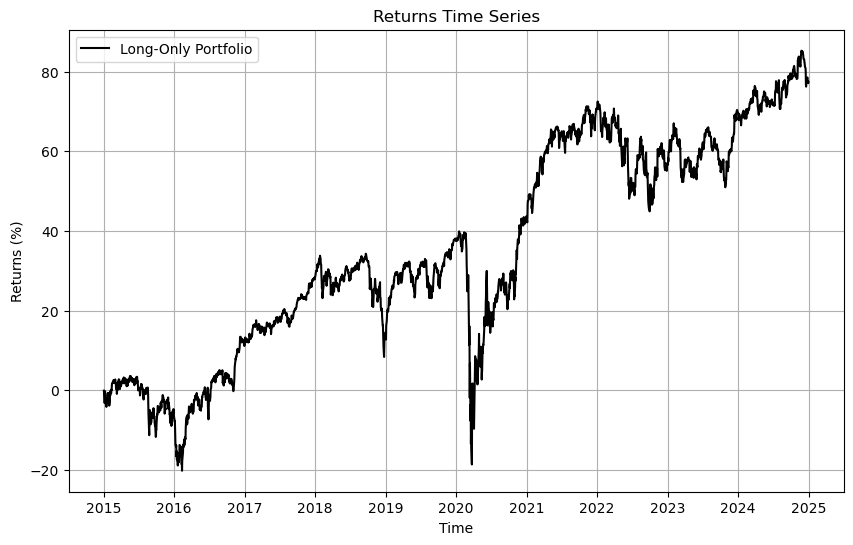

In [60]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(long_portfolio_returns.cumsum().mul(100), label='Long-Only Portfolio', color='black', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid()

# Show
plt.show() 

### Second Strategy: Betting Agains Beta ###

In [61]:
# Shrinking Betas
shrunk_betas = 0.6 * betas_series + 0.4

In [62]:
shrunk_betas.sort_values(ascending=False)

MTG     1.654071
MS      1.586718
LNC     1.562354
SANM    1.539829
MTW     1.512352
          ...   
ED      0.669915
CAG     0.663492
SNT     0.653328
SO      0.651468
GIS     0.638116
Name: history_beta, Length: 435, dtype: float64

In [63]:
# Fist, calculate Ranks
ranks = shrunk_betas.rank()

ranks

AAPL    225.0
ABT      27.0
ACGL     38.0
ADBE    331.0
ADI     290.0
        ...  
XRAY     96.0
XRX     285.0
YUM     118.0
ZBRA    152.0
ZION    382.0
Name: history_beta, Length: 435, dtype: float64

In [64]:
# Median
median_rank = ranks.median()

median_rank

218.0

In [65]:
# Second: define the groups
low_beta = ranks[ranks < median_rank]
high_beta = ranks[ranks >= median_rank]

In [66]:
# Non-scaled weights
z_bar = ranks.mean()

w_low = (z_bar - low_beta).clip(lower=0)
w_low = w_low / w_low.sum()

w_high = (high_beta - z_bar).clip(lower=0)
w_high = w_high / w_high.sum()

In [67]:
w_low

ABT     0.008075
ACGL    0.007610
ADM     0.003213
ADP     0.004355
AEE     0.006934
          ...   
XEL     0.008033
XOM     0.003467
XRAY    0.005158
YUM     0.004228
ZBRA    0.002790
Name: history_beta, Length: 217, dtype: float64

In [68]:
w_high

AAPL    0.000296
ADBE    0.004777
ADI     0.003044
ADSK    0.004355
AES     0.004312
          ...   
WOR     0.006638
WY      0.003002
X       0.008582
XRX     0.002833
ZION    0.006934
Name: history_beta, Length: 218, dtype: float64

In [69]:
# Scale to make beta neutral
beta_low = (w_low * shrunk_betas[w_low.index]).sum()
beta_high = (w_high * shrunk_betas[w_high.index]).sum()

w_low_scaled = w_low / beta_low
w_high_scaled = w_high / beta_high

In [70]:
bab_portfolio_weights = pd.concat([w_low_scaled, -w_high_scaled])
bab_portfolio_weights.name = 'weights'

bab_portfolio_weights.sort_values(ascending=True)

MTG    -0.007266
MS     -0.007233
LNC    -0.007199
SANM   -0.007166
MTW    -0.007133
          ...   
ED      0.011061
CAG     0.011113
SNT     0.011165
SO      0.011217
GIS     0.011269
Name: weights, Length: 435, dtype: float64

In [71]:
bab_portfolio_weights.sum().round(3)

0.436

In [72]:
# Portfolio Returns
bab_portfolio_returns = returns.loc['2015':] @ bab_portfolio_weights
bab_portfolio_returns.name = 'bab_portfolio_returns'

bab_portfolio_returns

Date
2015-01-02    0.000120
2015-01-05    0.005692
2015-01-06    0.007101
2015-01-07    0.009017
2015-01-08    0.005415
                ...   
2024-12-24    0.000318
2024-12-26   -0.000127
2024-12-27    0.002648
2024-12-30   -0.008731
2024-12-31   -0.000337
Name: bab_portfolio_returns, Length: 2516, dtype: float64

In [73]:
bab_portfolio_returns.mean()

0.00017949204275134146

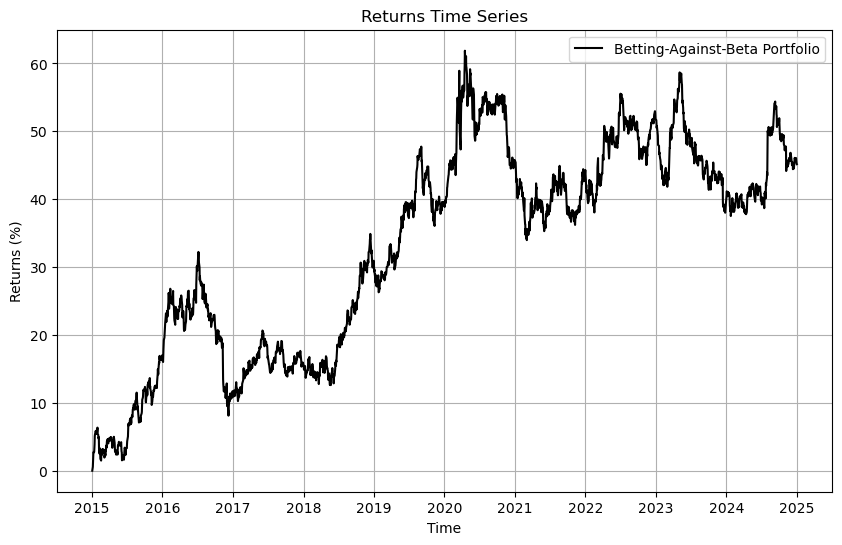

In [74]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(bab_portfolio_returns.cumsum().mul(100), label='Betting-Against-Beta Portfolio', color='black', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid()

# Show
plt.show() 

### Compare the Strategies ###

In [77]:
# Create DataFrame
strategies_df = pd.DataFrame(index = returns.loc['2015':].index)
strategies_df.index.name = 'date'
strategies_df['long_portfolio'] = long_portfolio_returns
strategies_df['bab_portfolio'] = bab_portfolio_returns

strategies_df

,long_portfolio,bab_portfolio
date,,
2015-01-02,-0.001040,0.000120
2015-01-05,-0.019442,0.005692
2015-01-06,-0.011864,0.007101
2015-01-07,0.012256,0.009017
2015-01-08,0.017394,0.005415
...,...,...
2024-12-24,0.007377,0.000318
2024-12-26,0.002342,-0.000127
2024-12-27,-0.007766,0.002648


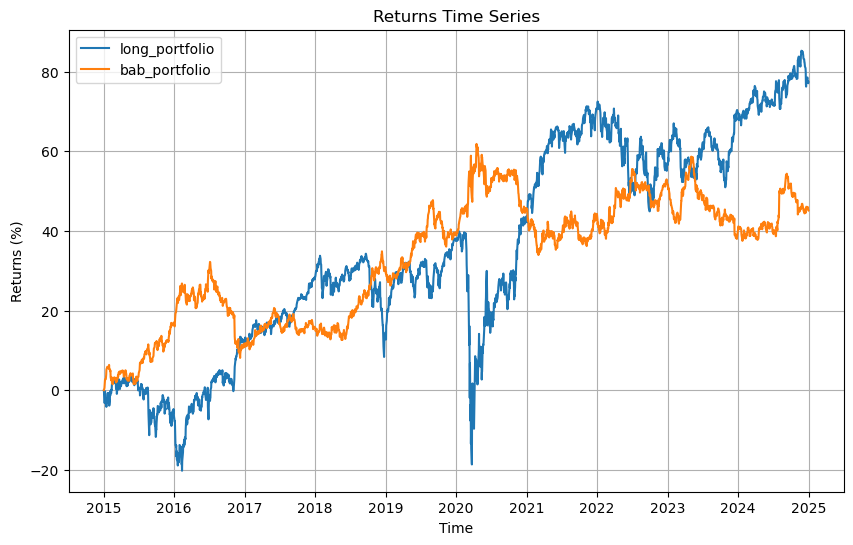

In [78]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(strategies_df.cumsum().mul(100), label=strategies_df.columns, alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid()

# Show
plt.show() 

In [79]:
# Analytics
analytics = calculate_analytics(strategies_df)

analytics

,Annualized Returns,Annualized Volatility,Sharpe Ratio,Max Drawdown,VaR 95%
long_portfolio,7.761919,20.713491,0.374728,-1.0,-1.908924
bab_portfolio,4.523199,11.785643,0.383789,-1.0,-1.137854


### Calculate the Portfolio Beta ###

In [80]:
# Create a DataFrame
regression_df = pd.DataFrame()
regression_df['portfolio_excess'] = bab_portfolio_returns - rfr['risk_free_rate'].loc['2015':]
regression_df['market_excess'] = market_premium.loc['2015':]
regression_df.dropna(inplace = True)

regression_df

,portfolio_excess,market_excess
Date,,
2015-01-02,0.000061,-0.000399
2015-01-05,0.005635,-0.018504
2015-01-06,0.007047,-0.008988
2015-01-07,0.008963,0.011508
2015-01-08,0.005359,0.017674
...,...,...
2024-12-24,0.000191,0.010855
2024-12-26,-0.000254,-0.000533
2024-12-27,0.002520,-0.011246


In [82]:
# Fit the WLS model
window = len(regression_df)

portfolio_model = model = sm.WLS(
    regression_df['portfolio_excess'], 
    sm.add_constant(regression_df['market_excess']), 
    weights=window*wexp(window, window/2)
)

results = model.fit()

print(results.summary())

                            WLS Regression Results                            
Dep. Variable:       portfolio_excess   R-squared:                       0.016
Model:                            WLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     40.96
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           1.85e-10
Time:                        13:58:59   Log-Likelihood:                 8638.2
No. Observations:                2516   AIC:                        -1.727e+04
Df Residuals:                    2514   BIC:                        -1.726e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.044e-05      0.000      0.537

### Implementing Rebalancing ###

In [83]:
# Function to calculate the weights (as we saw above)
def betting_against_beta_weights(
    betas: pd.Series
) -> pd.Series:
    
    # Drop NANs
    betas = betas.dropna()

    # Shrinkage
    w_shrink = 0.6      # Adjust
    betas_shrunk = w_shrink * betas + (1 - w_shrink) * 1.0

    # Ranking Betas
    ranks = betas_shrunk.rank()
    z_bar = ranks.mean()
    median_rank = ranks.median()

    # Split using the Median
    low_beta = ranks[ranks < median_rank]
    high_beta = ranks[ranks >= median_rank]

    # Calculate Weights
    w_low = (z_bar - low_beta).clip(lower=0)
    w_high = (high_beta - z_bar).clip(lower=0)

    # Standardize Weights
    w_low /= w_low.sum()
    w_high /= w_high.sum()

    # Scale betas so each side has a beta close to 1
    beta_low = (w_low * betas_shrunk[w_low.index]).sum()
    beta_high = (w_high * betas_shrunk[w_high.index]).sum()

    # Standardize Again
    w_low_scaled = w_low / beta_low
    w_high_scaled = w_high / beta_high

    # Concat
    bab_weights = pd.concat([w_low_scaled, -w_high_scaled])

    return bab_weights

In [85]:
# Fortunately, we calculated the betas (with a 252-d history in the previous notebook)
rolling_betas = pd.read_csv(r'..\additional_data\capm_rbetas.csv')
rolling_betas.set_index('Date', inplace=True)
rolling_betas.index = pd.to_datetime(rolling_betas.index)
rolling_betas = rolling_betas[returns.columns]

rolling_betas

,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WST,WY,X,XEL,XOM,XRAY,XRX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.335080,1.084290,-0.114335,1.052979,1.294690,0.494839,0.849479,0.700041,0.288025,0.343843,...,0.143045,0.489832,0.614822,0.348611,0.530261,0.557190,0.828263,0.530965,0.748833,0.852891
2000-01-04,1.418454,1.051470,-0.091197,1.168953,1.306070,0.472425,0.781621,0.752175,0.262505,0.285440,...,0.106170,0.534123,0.642049,0.264786,0.529788,0.506847,0.848708,0.522835,0.720079,0.888770
2000-01-05,1.440879,1.060008,-0.084862,1.189834,1.309468,0.471593,0.779101,0.745281,0.267594,0.287675,...,0.105733,0.539473,0.612853,0.268014,0.525762,0.508524,0.851524,0.521590,0.726198,0.893849
2000-01-06,1.440651,1.060747,-0.085251,1.190678,1.307600,0.471731,0.780039,0.743461,0.267240,0.287606,...,0.105504,0.540885,0.612360,0.267661,0.527185,0.508530,0.851091,0.521318,0.725240,0.894127
2000-01-07,1.447918,1.038326,-0.001634,1.208871,1.293162,0.478723,0.781721,0.877334,0.279948,0.297061,...,0.118292,0.465950,0.622311,0.259260,0.502271,0.486571,0.859092,0.471773,0.673694,0.864814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.900453,0.153382,0.532669,1.276747,1.636702,0.371718,0.506331,1.327005,0.077017,-0.061036,...,0.708042,0.575134,0.848306,-0.038703,0.198814,0.542305,1.006918,0.457147,1.235720,1.404490
2024-12-26,0.900734,0.152650,0.532828,1.275916,1.636147,0.370321,0.505644,1.327020,0.078033,-0.060859,...,0.707202,0.574744,0.851782,-0.038702,0.198456,0.538876,1.006911,0.455964,1.233641,1.402107
2024-12-27,0.906195,0.153808,0.533355,1.264858,1.617044,0.363623,0.503859,1.319360,0.086762,-0.065864,...,0.696915,0.572893,0.829599,-0.036025,0.195271,0.531051,0.990680,0.456436,1.242268,1.397838


In [86]:
# Function for the Rolling Weights
def calculate_bab_rolling_weights(
    beta_df, 
    rebalance_days=21
):
    # Rebalancing Dates
    rebalance_dates = beta_df.index[::rebalance_days]

    # List used for storing
    weights_list = []

    # Loop
    for date in rebalance_dates:
        # Betas for each date
        betas_today = beta_df.loc[date]
        
        # Calculate Weights and store them
        weights = betting_against_beta_weights(betas_today)
        weights.name = date
        weights_list.append(weights)

    # Create a DataFrame
    bab_weights_rebalance = pd.DataFrame(weights_list)

    # Reindexing for daily weights
    bab_weights_daily = bab_weights_rebalance.reindex(beta_df.index)

    # Forward Fill
    bab_weights_daily = bab_weights_daily.ffill().fillna(0)

    # Reindexing Columns to have consistency
    bab_weights_daily = bab_weights_daily.reindex(columns=beta_df.columns).fillna(0)

    return bab_weights_daily


In [87]:
# Get the Weights
bab_daily_weights = calculate_bab_rolling_weights(rolling_betas, rebalance_days=21)

bab_daily_weights

,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WST,WY,X,XEL,XOM,XRAY,XRX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,-0.006964,-0.005472,0.016635,-0.005204,-0.006887,0.002708,-0.003673,-0.001951,0.010677,0.008279,...,0.014778,0.003172,-0.001033,0.008047,0.000619,-0.000191,-0.00352,0.000542,-0.002334,-0.003788
2000-01-04,-0.006964,-0.005472,0.016635,-0.005204,-0.006887,0.002708,-0.003673,-0.001951,0.010677,0.008279,...,0.014778,0.003172,-0.001033,0.008047,0.000619,-0.000191,-0.00352,0.000542,-0.002334,-0.003788
2000-01-05,-0.006964,-0.005472,0.016635,-0.005204,-0.006887,0.002708,-0.003673,-0.001951,0.010677,0.008279,...,0.014778,0.003172,-0.001033,0.008047,0.000619,-0.000191,-0.00352,0.000542,-0.002334,-0.003788
2000-01-06,-0.006964,-0.005472,0.016635,-0.005204,-0.006887,0.002708,-0.003673,-0.001951,0.010677,0.008279,...,0.014778,0.003172,-0.001033,0.008047,0.000619,-0.000191,-0.00352,0.000542,-0.002334,-0.003788
2000-01-07,-0.006964,-0.005472,0.016635,-0.005204,-0.006887,0.002708,-0.003673,-0.001951,0.010677,0.008279,...,0.014778,0.003172,-0.001033,0.008047,0.000619,-0.000191,-0.00352,0.000542,-0.002334,-0.003788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,-0.002494,0.013852,0.006519,-0.005438,-0.006928,0.011326,0.007252,-0.005681,0.015482,0.016704,...,-0.000035,0.008148,-0.002286,0.017030,0.013363,0.005785,-0.00336,0.008963,-0.005265,-0.005611
2024-12-26,-0.002494,0.013852,0.006519,-0.005438,-0.006928,0.011326,0.007252,-0.005681,0.015482,0.016704,...,-0.000035,0.008148,-0.002286,0.017030,0.013363,0.005785,-0.00336,0.008963,-0.005265,-0.005611
2024-12-27,-0.002494,0.013852,0.006519,-0.005438,-0.006928,0.011326,0.007252,-0.005681,0.015482,0.016704,...,-0.000035,0.008148,-0.002286,0.017030,0.013363,0.005785,-0.00336,0.008963,-0.005265,-0.005611


In [88]:
# Calculate the Portfolio using rebalancing
bab_rebalancing_portfolio = (returns.loc[bab_daily_weights.index] * bab_daily_weights).sum(axis = 1)
bab_rebalancing_portfolio.name = 'bab_rebalancing_portfolio'

bab_rebalancing_portfolio

Date
2000-01-03   -0.014429
2000-01-04    0.009691
2000-01-05    0.017420
2000-01-06    0.023082
2000-01-07   -0.002544
                ...   
2024-12-24    0.003663
2024-12-26   -0.000884
2024-12-27    0.002358
2024-12-30   -0.012367
2024-12-31    0.006907
Name: bab_rebalancing_portfolio, Length: 6289, dtype: float64

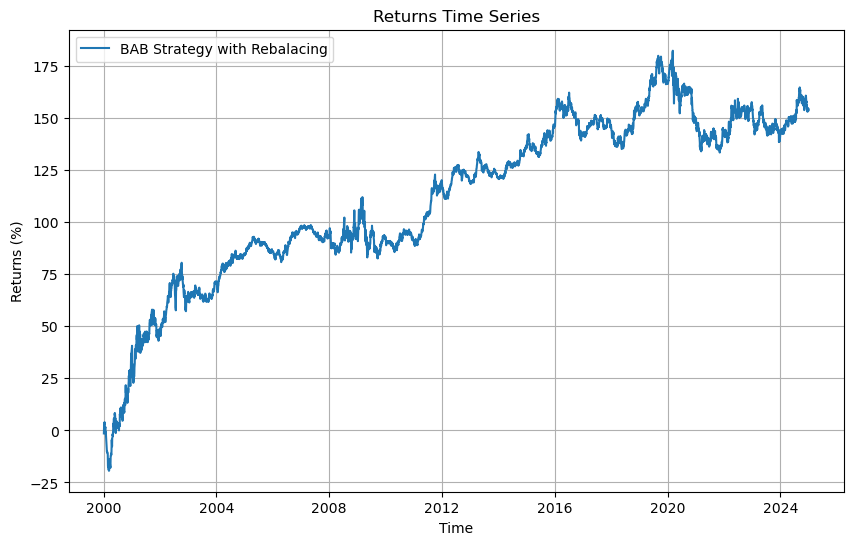

In [89]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(bab_rebalancing_portfolio.cumsum().mul(100), label='BAB Strategy with Rebalacing', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid()

# Show
plt.show() 

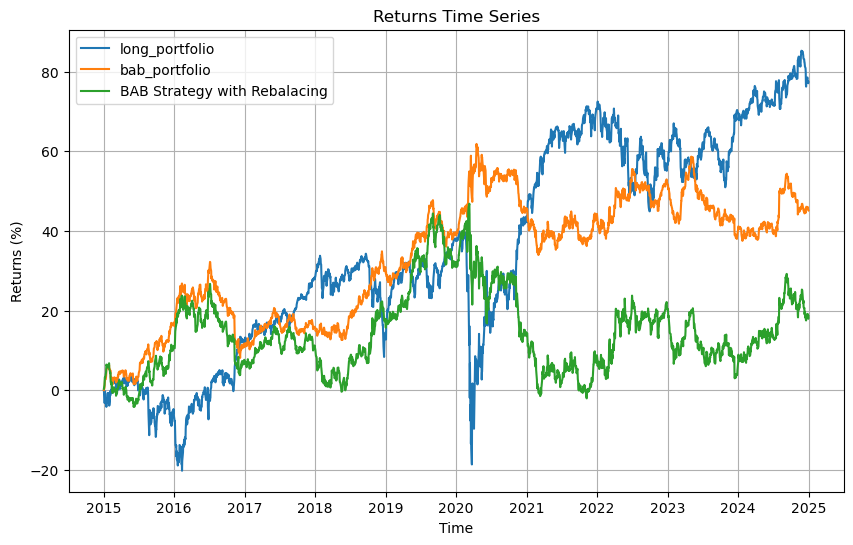

In [90]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(strategies_df.cumsum().mul(100), label=strategies_df.columns, alpha=1)
plt.plot(bab_rebalancing_portfolio.loc['2015':].cumsum().mul(100), label='BAB Strategy with Rebalacing', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid()

# Show
plt.show() 

### What about survivorship bias? ###

Previously, we built a portfolio avoiding survivorship bias and using a larger universe of stocks:

In [92]:
bab_realistic_portfolio = pd.read_csv(r'..\additional_data\betting_against_beta_portfolio.csv')
bab_realistic_portfolio.set_index('Date', inplace=True)
bab_realistic_portfolio.index = pd.to_datetime(bab_realistic_portfolio.index)

bab_realistic_portfolio

,portfolio_returns
Date,
2000-01-03,-0.015830
2000-01-04,0.010408
2000-01-05,0.018127
2000-01-06,0.023416
2000-01-07,-0.003012
...,...
2024-12-24,0.002694
2024-12-26,-0.000779
2024-12-27,0.002842


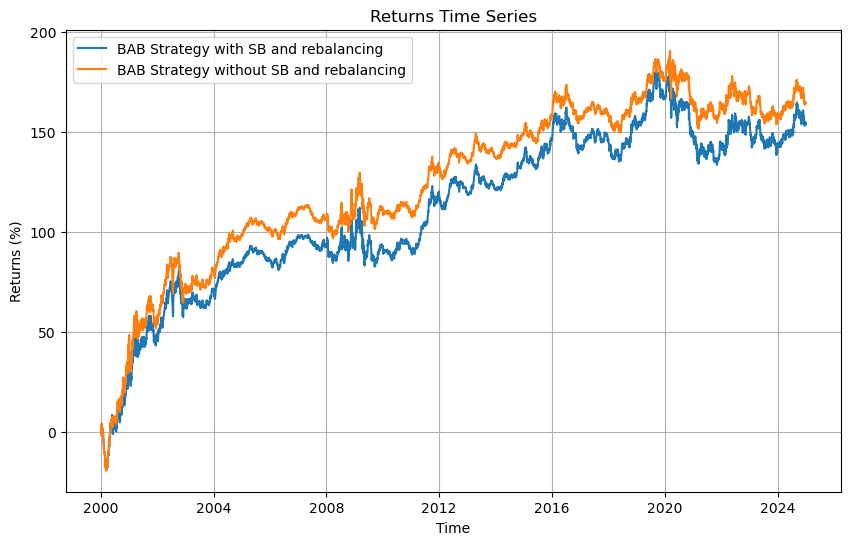

In [96]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(bab_rebalancing_portfolio.cumsum().mul(100), label='BAB Strategy with SB and rebalancing', alpha=1)
plt.plot(bab_realistic_portfolio.cumsum().mul(100), label='BAB Strategy without SB and rebalancing', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid()

# Show
plt.show() 